In [9]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

/home/sudharshan/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)

Epoch 1/5


2024-04-22 18:57:33.568710: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7903 - loss: 4.0024

2024-04-22 18:58:19.467981: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7904 - loss: 3.9985 - val_accuracy: 0.8842 - val_loss: 0.3379
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.8957 - loss: 0.2809 - val_accuracy: 0.8907 - val_loss: 0.3251
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9136 - loss: 0.2358 - val_accuracy: 0.8957 - val_loss: 0.3079
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9242 - loss: 0.2044 - val_accuracy: 0.8867 - val_loss: 0.3397
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 32ms/step - accuracy: 0.9297 - loss: 0.1923 - val_accuracy: 0.8863 - val_loss: 0.3689


In [11]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']

In [12]:
predictions = model.predict(test_x[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [13]:
label = labels[np.argmax(predictions)]

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

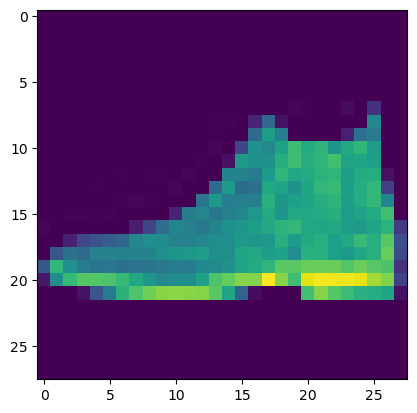

In [14]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show

tshirt


<function matplotlib.pyplot.show(close=None, block=None)>

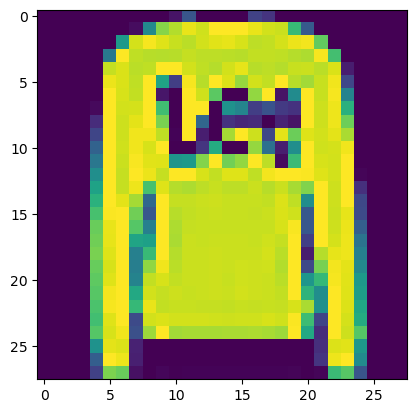

In [17]:
print('tshirt')
plt.imshow(test_x[:2][1])
plt.show

pants


<function matplotlib.pyplot.show(close=None, block=None)>

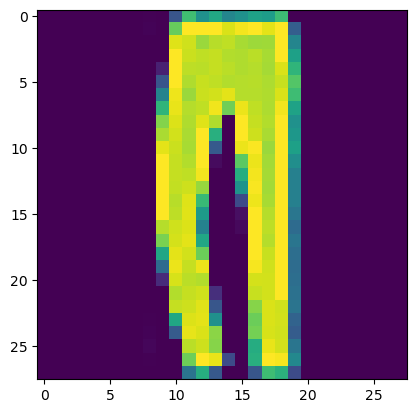

In [25]:
print('trousers')
plt.imshow(test_x[1:3][1])
plt.show

pullovers


<function matplotlib.pyplot.show(close=None, block=None)>

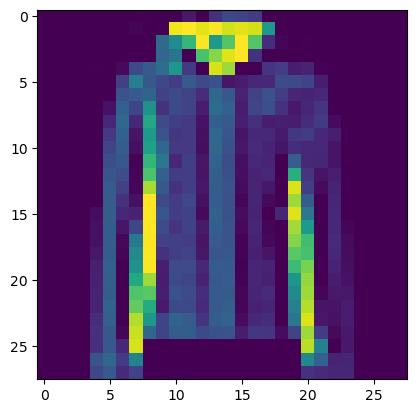

In [31]:
print('pullovers')
plt.imshow(test_x[5:7][1])
plt.show

pullovers


<function matplotlib.pyplot.show(close=None, block=None)>

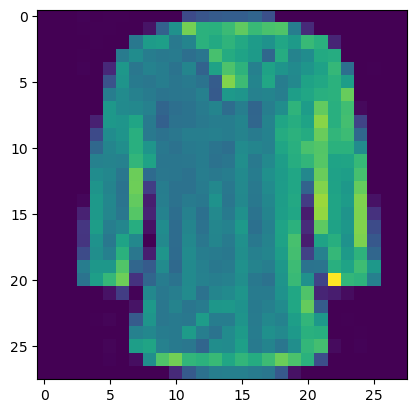

In [27]:
print('coats')
plt.imshow(test_x[3:5][1])
plt.show